Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise05/exercise05.ipynb)

# Exercise 5

## Problem

So far, we've been examining affordable housing in DC with summary tables. Some of you have figured out how to incorporate graphic variables into these tables, using color to highlight minimums and maximums (good Googling!). However, we can often communicate much more convincingly, and even see patterns better ourselves, by making charts.

For this week's exercise, please:

- Write a function that makes a plot communicating a valuable statistic about affordable housing in each ward. You get to choose what's most valuable to show.
- The function should take an argument to filter by project status so it can be used to generate a plot representing projects that are either completed, under construction, or in the pipeline. (The same generalized function should be able to represent projects with any status.)
    - Optional: Can you specify the argument so it's also easy to see data for projects with all three statuses at once?
    - Optional: The function may also take additional arguments for whatever customization you think would be valuable for an end-user.
- The function should be stored in a module, loaded into a notebook, and called at least once in the notebook to demonstrate it.
- Please make a pull request with a folder containing your module (`.py` file), notebook (`.ipynb` file), any CSV files your analysis depends on, and any additional graphics files.

Bonus: Make it even better by exporting one plot to Illustrator or another software and fine-tuning it. Then include it in your PR folder and use markdown to show the resulting graphic in your notebook. (Hint: I demonstrate how to do this with markdown in the demo05 notebook.)

## Data

CSVs for the affordable housing dataset and ward census data are included on GitHub at `exercises/exercise05`. Please feel free to draw on other datasets, though this is not required. If you do use other data, please cite them, preferably with links, with markdown in your notebook or through comments in your code.


In [2]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import os

In [10]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/ursp688y_shared_data/Abdulrazaq')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
os.listdir()

['Working exercise05-Abdulrazaq.ipynb',
 'demoo05.py',
 'affordable_housing .csv',
 '__pycache__']

In [ ]:
#load and preview data
affordable_housing = pd.read_csv('affordable_housing.csv')
affordable_housing.head()

In [ ]:
 # Data cleaning:
idx = affordable_housing[affordable_housing['MAR_WARD'] == '1'].index[0]
affordable_housing.at[idx, 'MAR_WARD'] = 'Ward 1'

In [ ]:
# Confirm consistency
ward_counts = affordable_housing['MAR_WARD'].value_counts()
ward_counts

In [ ]:
# referernce relevant columns for plotting
income_levels = ['AFFORDABLE_UNITS_AT_0_30_AMI', 'AFFORDABLE_UNITS_AT_31_50_AMI', 'AFFORDABLE_UNITS_AT_51_60_AMI', 'AFFORDABLE_UNITS_AT_61_80_AMI', 'AFFORDABLE_UNITS_AT_81_AMI']
income_levels

In [ ]:
import seaborn as sns
#New figure
fig = plt.figure()


# Set the style of the plot
sns.set(style="whitegrid")


def plot_affordable_housing_by_status(affordable_housing, status):
     # Filter the data based on the provided project status
    filtered_data = affordable_housing[affordable_housing['STATUS_PUBLIC'] == status]

    # Grouping the data by income levels and sum the affordable units for each income level
    income_groups = ['AFFORDABLE_UNITS_AT_0_30_AMI', 'AFFORDABLE_UNITS_AT_31_50_AMI',
                     'AFFORDABLE_UNITS_AT_51_60_AMI', 'AFFORDABLE_UNITS_AT_61_80_AMI',
                     'AFFORDABLE_UNITS_AT_81_AMI']

    grouped_data = filtered_data.groupby('MAR_WARD')[income_groups].sum()

    # Plotting the grouped bar chart
    ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
    ax.set_xlabel('') #setting x axis to an empty string
    ax.set_ylabel('Number of Affordable Housing Units')
    ax.grid(False)
    plt.title(f'Affordable Housing Units by Income Level in {status} Projects')
    plt.xticks(rotation=45)
    plt.legend(title='Income Level')
    plt.tight_layout()

    sns.despine()
    plt.show()

    #VISUALIZING D.C.'s  AFFORDABLE HOUSING (TODAY)
plot_affordable_housing_by_status(affordable_housing, 'Under Construction')

In [ ]:
#VISUALIZING D.C.'s  AFFORDABLE HOUSING (BEFORE)
plot_affordable_housing_by_status(affordable_housing, 'Completed 2015 to Date')

In [12]:
from demoo05 import plot_affordable_housing_by_status

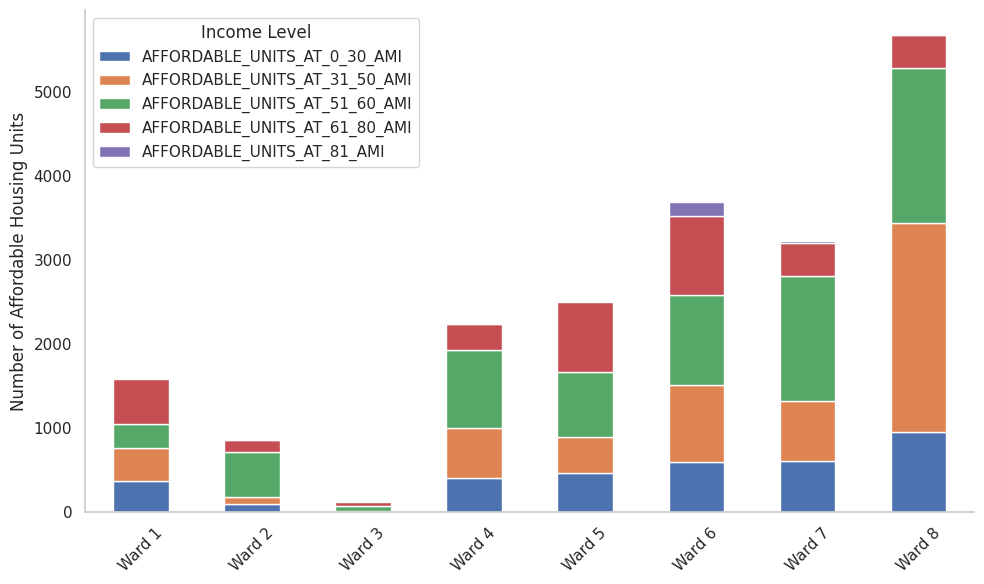

In [11]:
fig = plot_affordable_housing_by_status(affordable_housing, 'Completed 2015 to Date')

In [ ]:
type(fig)

In [ ]:
plt.savefig('plot.eps', format='eps')

In [ ]:
fig.savefig('plot.png', format='png', dpi=300)